# First stage of an academic OSIOSN project 
### OSIOSN - ENG: Optimization Of Structures And Calculations in Neural Networks
### Downloading APNEA dataset from physionet

In [ ]:
# Windows
! wget -r -N -c -np https://physionet.org/files/apnea-ecg/1.0.0/ 

# Ubuntu
# ! apt update && apt install wget
# ! wget -r -N -c -np https://physionet.org/files/apnea-ecg/1.0.0/ 



### Libraries and constants for this notebook

In [85]:
import wfdb
from tqdm import tqdm
import os
import numpy as np
import matplotlib.pyplot as plt
from customLib.preprocess import *

In [108]:
DATASET_PATH = "./physionet.org/files/apnea-ecg/1.0.0"
PREPROCESSED_DATASET_PATH = "./preprocessed"
FS = 100 # sampling frequency

In [218]:
#plotting the signal
def plot_ecg(signal, fs: int = 100):
    t = [1/fs * x for x in range(len(signal))]
    plt.plot(figsize=(5,4))
    plt.plot(t, signal)
    plt.grid(color="#858281", linestyle='--')
    plt.legend(["ECG"])
    plt.xlabel("Time [s]")
    plt.show()


In [215]:
# Read all ECG signals and perform preprocessing
# - smoothen the signal via manual Conv1D
# - split signal into smaller, overlapping windows

def preprocess_apnea_dataset(dataset_path="./physionet.org/files/apnea-ecg/1.0.0"):
  # Gather only the files with .dat extension
  print("Looking for ECG files...\n")
  files = []

  for file in os.listdir(DATASET_PATH):
    if file.endswith(".dat") & (not file.endswith("r.dat")): # do not read respiratory data
      files.append(file.split(".")[0])

    if not (os.path.isdir(PREPROCESSED_DATASET_PATH)):
      print("Creating target directory...\n")
      os.mkdir(PREPROCESSED_DATASET_PATH)

  ecgList = []
  print(f"Total files to process: {len(files)}\n")
  
  for file_idx in tqdm(range(len(files))):
    record = wfdb.rdrecord(os.path.join(DATASET_PATH , files[file_idx]), channels=[0])
    signal = record.p_signal.flatten()
    #signal = myConv1D(signal=signal, kernel_length=3, padding='same')

    assert record.fs == FS

    ecg_windows = split_signal(signal=signal, fs=FS, overlap_factor=0.1)
    for window in ecg_windows:
      ecgList.append(window)

  ecgList = np.array(ecgList)

  print(f"Saving preprocessed ECGs to {PREPROCESSED_DATASET_PATH}")
  np.save(PREPROCESSED_DATASET_PATH + "ECGs.npy", ecgList)
  return ecgList


In [216]:
ECGs = preprocess_apnea_dataset(DATASET_PATH)

Looking for ECG files...

Total files to process: 70



100%|██████████| 70/70 [00:01<00:00, 43.86it/s]


Saving preprocessed ECGs to ./preprocessed/


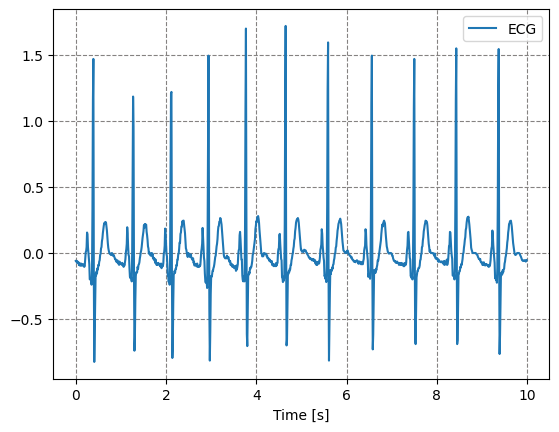

In [219]:
plot_ecg(ECGs[0])